<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkPY0220ENSkillsNetwork900-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo">
    </a>
</p>


<h1>Extracting and Visualizing Stock Data</h1>
<h2>Description</h2>


Extracting essential data from a dataset and displaying it is a necessary part of data science; therefore individuals can make correct decisions based on the data. In this assignment, you will extract some stock data, you will then display this data in a graph.


<h2>Table of Contents</h2>
<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ul>
        <li>Define a Function that Makes a Graph</li>
        <li>Question 1: Use yfinance to Extract Stock Data</li>
        <li>Question 2: Use Webscraping to Extract Tesla Revenue Data</li>
        <li>Question 3: Use yfinance to Extract Stock Data</li>
        <li>Question 4: Use Webscraping to Extract GME Revenue Data</li>
        <li>Question 5: Plot Tesla Stock Graph</li>
        <li>Question 6: Plot GameStop Stock Graph</li>
    </ul>
<p>
    Estimated Time Needed: <strong>30 min</strong></p>
</div>

<hr>


***Note***:- If you are working Locally using anaconda, please uncomment the following code and execute it.


In [1]:
#!pip install yfinance==0.2.38
#!pip install pandas==2.2.2
#!pip install nbformat

In [2]:
!pip install yfinance==0.1.67
!mamba install bs4==4.10.0 -y
!pip install nbformat==4.2.0

  Attempting uninstall: yfinance
    Found existing installation: yfinance 0.2.4
    Uninstalling yfinance-0.2.4:
      Successfully uninstalled yfinance-0.2.4

                  __    __    __    __
                 /  \  /  \  /  \  /  \
                /    \/    \/    \/    \
███████████████/  /██/  /██/  /██/  /████████████████████████
              /  / \   / \   / \   / \  \____
             /  /   \_/   \_/   \_/   \    o \__,
            / _/                       \_____/  `
            |/
        ███╗   ███╗ █████╗ ███╗   ███╗██████╗  █████╗
        ████╗ ████║██╔══██╗████╗ ████║██╔══██╗██╔══██╗
        ██╔████╔██║███████║██╔████╔██║██████╔╝███████║
        ██║╚██╔╝██║██╔══██║██║╚██╔╝██║██╔══██╗██╔══██║
        ██║ ╚═╝ ██║██║  ██║██║ ╚═╝ ██║██████╔╝██║  ██║
        ╚═╝     ╚═╝╚═╝  ╚═╝╚═╝     ╚═╝╚═════╝ ╚═╝  ╚═╝

        mamba (1.4.2) supported by @QuantStack

        GitHub:  https://github.com/mamba-org/mamba
        Twitter: https://twitter.com/QuantStack

█████████████████

In [3]:
import yfinance as yf
import pandas as pd
import requests
from bs4 import BeautifulSoup
import plotly.graph_objects as go
from plotly.subplots import make_subplots

In Python, you can ignore warnings using the warnings module. You can use the filterwarnings function to filter or ignore specific warning messages or categories.


In [4]:
import warnings
# Ignore all warnings
warnings.filterwarnings("ignore", category=FutureWarning)

## Define Graphing Function


In this section, we define the function `make_graph`. **You don't have to know how the function works, you should only care about the inputs. It takes a dataframe with stock data (dataframe must contain Date and Close columns), a dataframe with revenue data (dataframe must contain Date and Revenue columns), and the name of the stock.**


In [5]:
def make_graph(stock_data, revenue_data, stock):
    fig = make_subplots(rows=2, cols=1, shared_xaxes=True, subplot_titles=("Historical Share Price", "Historical Revenue"), vertical_spacing = .3)
    stock_data_specific = stock_data[stock_data.Date <= '2021--06-14']
    revenue_data_specific = revenue_data[revenue_data.Date <= '2021-04-30']
    fig.add_trace(go.Scatter(x=pd.to_datetime(stock_data_specific.Date, infer_datetime_format=True), y=stock_data_specific.Close.astype("float"), name="Share Price"), row=1, col=1)
    fig.add_trace(go.Scatter(x=pd.to_datetime(revenue_data_specific.Date, infer_datetime_format=True), y=revenue_data_specific.Revenue.astype("float"), name="Revenue"), row=2, col=1)
    fig.update_xaxes(title_text="Date", row=1, col=1)
    fig.update_xaxes(title_text="Date", row=2, col=1)
    fig.update_yaxes(title_text="Price ($US)", row=1, col=1)
    fig.update_yaxes(title_text="Revenue ($US Millions)", row=2, col=1)
    fig.update_layout(showlegend=False,
    height=900,
    title=stock,
    xaxis_rangeslider_visible=True)
    fig.show()

Use the make_graph function that we’ve already defined. You’ll need to invoke it in questions 5 and 6 to display the graphs and create the dashboard. 
> **Note: You don’t need to redefine the function for plotting graphs anywhere else in this notebook; just use the existing function.**


## Question 1: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is Tesla and its ticker symbol is `TSLA`.


In [6]:
 import yfinance as yf

# Create a ticker object for Tesla
tsla = yf.Ticker('TSLA')

# Extract data
tsla_info = tsla.info
tsla_history = tsla.history(period='max')

# Display the extracted data
print(tsla_info)
print(tsla_history.head())


{'regularMarketPrice': None, 'preMarketPrice': None, 'logo_url': ''}
                Open      High       Low     Close     Volume  Dividends  \
Date                                                                       
2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

            Stock Splits  
Date                      
2010-06-29           0.0  
2010-06-30           0.0  
2010-07-01           0.0  
2010-07-02           0.0  
2010-07-06           0.0  


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `tesla_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


**Reset the index** using the `reset_index(inplace=True)` function on the tesla_data DataFrame and display the first five rows of the `tesla_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 1 to the results below.


In [7]:
import yfinance as yf
import pandas as pd

# Create a ticker object for Tesla
tsla = yf.Ticker('TSLA')

# Extract historical market data for Tesla
tesla_data = tsla.history(period='max')

# Reset the index
tesla_data.reset_index(inplace=True)

# Display the first five rows
print(tesla_data.head())


        Date      Open      High       Low     Close     Volume  Dividends  \
0 2010-06-29  1.266667  1.666667  1.169333  1.592667  281494500          0   
1 2010-06-30  1.719333  2.028000  1.553333  1.588667  257806500          0   
2 2010-07-01  1.666667  1.728000  1.351333  1.464000  123282000          0   
3 2010-07-02  1.533333  1.540000  1.247333  1.280000   77097000          0   
4 2010-07-06  1.333333  1.333333  1.055333  1.074000  103003500          0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 2: Use Webscraping to Extract Tesla Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm Save the text of the response as a variable named `html_data`.


In [8]:
import requests

# URL of the webpage to download
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Save the response text as a variable
    html_data = response.text
    print("Webpage downloaded successfully.")
else:
    print(f"Failed to download webpage. Status code: {response.status_code}")


Webpage downloaded successfully.


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [9]:
import requests
from bs4 import BeautifulSoup

# URL of the webpage to download
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Save the response text as a variable
    html_data = response.text
    print("Webpage downloaded successfully.")
else:
    print(f"Failed to download webpage. Status code: {response.status_code}")

# Parse the HTML data using BeautifulSoup with html.parser
soup = BeautifulSoup(html_data, 'html.parser')

# Print the parsed HTML (optional)
print(soup.prettify())


Webpage downloaded successfully.
<!DOCTYPE html>
<!--[if lt IE 7]>      <html class="no-js lt-ie9 lt-ie8 lt-ie7"> <![endif]-->
<!--[if IE 7]>         <html class="no-js lt-ie9 lt-ie8"> <![endif]-->
<!--[if IE 8]>         <html class="no-js lt-ie9"> <![endif]-->
<!--[if gt IE 8]><!-->
<html class="no-js">
 <!--<![endif]-->
 <head>
  <meta charset="utf-8"/>
  <meta content="IE=edge,chrome=1" http-equiv="X-UA-Compatible"/>
  <link href="https://www.macrotrends.net/stocks/charts/TSLA/tesla/revenue" rel="canonical"/>
  <title>
   Tesla Revenue 2010-2022 | TSLA | MacroTrends
  </title>
  <meta content="Tesla annual/quarterly revenue history and growth rate from 2010 to 2022. Revenue can be defined as the amount of money a company receives from its customers in exchange for the sales of goods or services.  Revenue is the top line item on an income statement from which all costs and expenses are subtracted to arrive at net income.    
				
				&lt;ul style='margin-top:10px;'&gt;
				&lt;li&gt;

Using `BeautifulSoup` or the `read_html` function extract the table with `Tesla Revenue` and store it into a dataframe named `tesla_revenue`. The dataframe should have columns `Date` and `Revenue`.


<details><summary>Step-by-step instructions</summary>

```

Here are the step-by-step instructions:

1. Create an Empty DataFrame
2. Find the Relevant Table
3. Check for the Tesla Quarterly Revenue Table
4. Iterate Through Rows in the Table Body
5. Extract Data from Columns
6. Append Data to the DataFrame

```
</details>


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1

We are focusing on quarterly revenue in the lab.
```

</details>


In [10]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage to download
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Save the response text as a variable
    html_data = response.text
    print("Webpage downloaded successfully.")
else:
    print(f"Failed to download webpage. Status code: {response.status_code}")

# Parse the HTML data using BeautifulSoup with html.parser
soup = BeautifulSoup(html_data, 'html.parser')

# Create an empty DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Find the table with Tesla Revenue
table = soup.find_all("tbody")[1]

# Iterate through the rows in the table body
for row in table.find_all('tr'):
    cols = row.find_all('td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip().replace(',', '').replace('$', '')

    # Append the extracted data to the DataFrame
    tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

# Convert the 'Revenue' column to numeric type
tesla_revenue['Revenue'] = pd.to_numeric(tesla_revenue['Revenue'], errors='coerce')

# Display the DataFrame
print(tesla_revenue)

# Alternatively, using the read_html function
tables = pd.read_html(html_data)
tesla_revenue_alt = tables[1]
tesla_revenue_alt.columns = ["Date", "Revenue"]
tesla_revenue_alt['Revenue'] = tesla_revenue_alt['Revenue'].replace({'\$': '', ',': ''}, regex=True).astype(float)
print(tesla_revenue_alt)


Webpage downloaded successfully.
          Date  Revenue
0   2022-09-30  21454.0
1   2022-06-30  16934.0
2   2022-03-31  18756.0
3   2021-12-31  17719.0
4   2021-09-30  13757.0
5   2021-06-30  11958.0
6   2021-03-31  10389.0
7   2020-12-31  10744.0
8   2020-09-30   8771.0
9   2020-06-30   6036.0
10  2020-03-31   5985.0
11  2019-12-31   7384.0
12  2019-09-30   6303.0
13  2019-06-30   6350.0
14  2019-03-31   4541.0
15  2018-12-31   7226.0
16  2018-09-30   6824.0
17  2018-06-30   4002.0
18  2018-03-31   3409.0
19  2017-12-31   3288.0
20  2017-09-30   2985.0
21  2017-06-30   2790.0
22  2017-03-31   2696.0
23  2016-12-31   2285.0
24  2016-09-30   2298.0
25  2016-06-30   1270.0
26  2016-03-31   1147.0
27  2015-12-31   1214.0
28  2015-09-30    937.0
29  2015-06-30    955.0
30  2015-03-31    940.0
31  2014-12-31    957.0
32  2014-09-30    852.0
33  2014-06-30    769.0
34  2014-03-31    621.0
35  2013-12-31    615.0
36  2013-09-30    431.0
37  2013-06-30    405.0
38  2013-03-31    562.0
39  201

Execute the following line to remove the comma and dollar sign from the `Revenue` column. 


In [13]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage to download
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/revenue.htm'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Save the response text as a variable
    html_data = response.text
    print("Webpage downloaded successfully.")
else:
    print(f"Failed to download webpage. Status code: {response.status_code}")

# Parse the HTML data using BeautifulSoup with html.parser
soup = BeautifulSoup(html_data, 'html.parser')

# Create an empty DataFrame
tesla_revenue = pd.DataFrame(columns=["Date", "Revenue"])

# Find the table with Tesla Revenue
table = soup.find_all("tbody")[1]

# Iterate through the rows in the table body
for row in table.find_all('tr'):
    cols = row.find_all('td')
    date = cols[0].text.strip()
    revenue = cols[1].text.strip()

    # Append the extracted data to the DataFrame
    tesla_revenue = tesla_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)

# Remove the comma and dollar sign from the 'Revenue' column
tesla_revenue['Revenue'] = tesla_revenue['Revenue'].replace({'\$': '', ',': ''}, regex=True)

# Display the DataFrame
print(tesla_revenue)


Webpage downloaded successfully.
          Date Revenue
0   2022-09-30   21454
1   2022-06-30   16934
2   2022-03-31   18756
3   2021-12-31   17719
4   2021-09-30   13757
5   2021-06-30   11958
6   2021-03-31   10389
7   2020-12-31   10744
8   2020-09-30    8771
9   2020-06-30    6036
10  2020-03-31    5985
11  2019-12-31    7384
12  2019-09-30    6303
13  2019-06-30    6350
14  2019-03-31    4541
15  2018-12-31    7226
16  2018-09-30    6824
17  2018-06-30    4002
18  2018-03-31    3409
19  2017-12-31    3288
20  2017-09-30    2985
21  2017-06-30    2790
22  2017-03-31    2696
23  2016-12-31    2285
24  2016-09-30    2298
25  2016-06-30    1270
26  2016-03-31    1147
27  2015-12-31    1214
28  2015-09-30     937
29  2015-06-30     955
30  2015-03-31     940
31  2014-12-31     957
32  2014-09-30     852
33  2014-06-30     769
34  2014-03-31     621
35  2013-12-31     615
36  2013-09-30     431
37  2013-06-30     405
38  2013-03-31     562
39  2012-12-31     306
40  2012-09-30      50
4

Execute the following lines to remove an null or empty strings in the Revenue column.


In [14]:
tesla_revenue.dropna(inplace=True)

tesla_revenue = tesla_revenue[tesla_revenue['Revenue'] != ""]

Display the last 5 row of the `tesla_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [18]:
tesla_revenue.tail()

,Date,Revenue
48,2010-09-30,31
49,2010-06-30,28
50,2010-03-31,21
52,2009-09-30,46
53,2009-06-30,27


## Question 3: Use yfinance to Extract Stock Data


Using the `Ticker` function enter the ticker symbol of the stock we want to extract data on to create a ticker object. The stock is GameStop and its ticker symbol is `GME`.


In [21]:
import yfinance as yf

# Create a ticker object for GameStop
gme = yf.Ticker('GME')

# Extract general information about GameStop
gme_info = gme.info
print("General Info:", gme_info)



# Display the first five rows
print(gme_history.head())


General Info: {'regularMarketPrice': None, 'preMarketPrice': None, 'logo_url': ''}
        Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  1.620128  1.693350  1.603296  1.691666  76216000        0.0   
1 2002-02-14  1.712708  1.716074  1.670626  1.683251  11021600        0.0   
2 2002-02-15  1.683251  1.687459  1.658002  1.674834   8389600        0.0   
3 2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
4 2002-02-20  1.615920  1.662210  1.603296  1.662210   6892800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


Using the ticker object and the function `history` extract stock information and save it in a dataframe named `gme_data`. Set the `period` parameter to ` "max" ` so we get information for the maximum amount of time.


In [22]:
import yfinance as yf

# Create a ticker object for GameStop
gme = yf.Ticker('GME')

# Extract historical market data for GameStop with the period set to 'max'
gme_data = gme.history(period='max')

# Reset the index
gme_data.reset_index(inplace=True)

# Display the first five rows
print(gme_data.head())


        Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  1.620128  1.693350  1.603296  1.691666  76216000        0.0   
1 2002-02-14  1.712708  1.716074  1.670626  1.683251  11021600        0.0   
2 2002-02-15  1.683250  1.687458  1.658001  1.674834   8389600        0.0   
3 2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
4 2002-02-20  1.615921  1.662210  1.603296  1.662210   6892800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


**Reset the index** using the `reset_index(inplace=True)` function on the gme_data DataFrame and display the first five rows of the `gme_data` dataframe using the `head` function. Take a screenshot of the results and code from the beginning of Question 3 to the results below.


In [23]:
import yfinance as yf

# Create a ticker object for GameStop
gme = yf.Ticker('GME')

# Extract historical market data for GameStop with the period set to 'max'
gme_data = gme.history(period='max')

# Reset the index inplace
gme_data.reset_index(inplace=True)

# Display the first five rows of gme_data
print(gme_data.head())


        Date      Open      High       Low     Close    Volume  Dividends  \
0 2002-02-13  1.620128  1.693350  1.603296  1.691666  76216000        0.0   
1 2002-02-14  1.712707  1.716073  1.670626  1.683250  11021600        0.0   
2 2002-02-15  1.683251  1.687459  1.658002  1.674834   8389600        0.0   
3 2002-02-19  1.666418  1.666418  1.578047  1.607504   7410400        0.0   
4 2002-02-20  1.615920  1.662210  1.603296  1.662210   6892800        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


## Question 4: Use Webscraping to Extract GME Revenue Data


Use the `requests` library to download the webpage https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html. Save the text of the response as a variable named `html_data_2`.


In [24]:
import requests

# URL of the webpage to download
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Save the response text as a variable
    html_data_2 = response.text
    print("Webpage downloaded successfully.")
else:
    print(f"Failed to download webpage. Status code: {response.status_code}")


Webpage downloaded successfully.


Parse the html data using `beautiful_soup` using parser i.e `html5lib` or `html.parser`.


In [25]:
soup = BeautifulSoup(html_data_2, 'html.parser')

Using `BeautifulSoup` or the `read_html` function extract the table with `GameStop Revenue` and store it into a dataframe named `gme_revenue`. The dataframe should have columns `Date` and `Revenue`. Make sure the comma and dollar sign is removed from the `Revenue` column.


> **Note: Use the method similar to what you did in question 2.**  


<details><summary>Click here if you need help locating the table</summary>

```
    
Below is the code to isolate the table, you will now need to loop through the rows and columns like in the previous lab
    
soup.find_all("tbody")[1]
    
If you want to use the read_html function the table is located at index 1


```

</details>


In [28]:
import requests
from bs4 import BeautifulSoup
import pandas as pd

# URL of the webpage to download
url = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/labs/project/stock.html'

# Send a GET request to the URL
response = requests.get(url)

# Check if the request was successful
if response.status_code == 200:
    # Parse the HTML data using BeautifulSoup
    soup = BeautifulSoup(response.text, 'html.parser')
    
    # Find the table with GameStop Revenue (located at index 1)
    table = soup.find_all("tbody")[1]
    
    # Create an empty DataFrame
    gme_revenue = pd.DataFrame(columns=["Date", "Revenue"])
    
    # Iterate through the rows in the table body
    for row in table.find_all('tr'):
        cols = row.find_all('td')
        if len(cols) > 1:
            date = cols[0].text.strip()
            revenue = cols[1].text.strip().replace(',', '').replace('$', '')
            
            # Append the extracted data to the DataFrame
            gme_revenue = gme_revenue.append({"Date": date, "Revenue": revenue}, ignore_index=True)
    
    # Convert the 'Revenue' column to numeric type
    gme_revenue['Revenue'] = pd.to_numeric(gme_revenue['Revenue'], errors='coerce')
    
    # Display the DataFrame
    print(gme_revenue)

else:
    print(f"Failed to download webpage. Status code: {response.status_code}")
    

gme_revenue.tail()


          Date  Revenue
0   2020-04-30     1021
1   2020-01-31     2194
2   2019-10-31     1439
3   2019-07-31     1286
4   2019-04-30     1548
..         ...      ...
57  2006-01-31     1667
58  2005-10-31      534
59  2005-07-31      416
60  2005-04-30      475
61  2005-01-31      709

[62 rows x 2 columns]


,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


Display the last five rows of the `gme_revenue` dataframe using the `tail` function. Take a screenshot of the results.


In [27]:
gme_revenue.tail()

,Date,Revenue
57,2006-01-31,1667
58,2005-10-31,534
59,2005-07-31,416
60,2005-04-30,475
61,2005-01-31,709


## Question 5: Plot Tesla Stock Graph


Use the `make_graph` function to graph the Tesla Stock Data, also provide a title for the graph. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(tesla_data, tesla_revenue, 'Tesla')`.

```
    
</details>


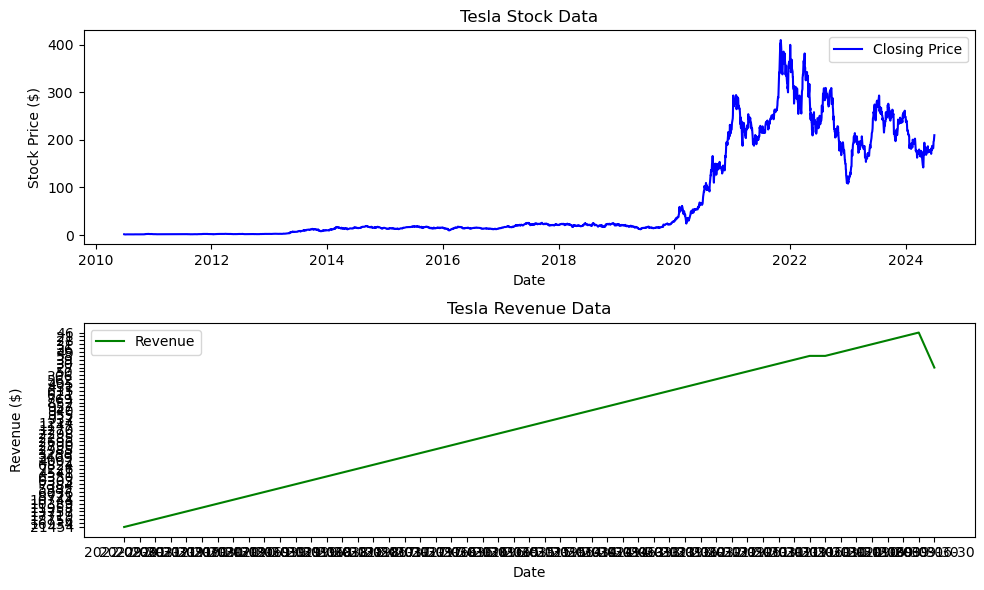

In [30]:
import matplotlib.pyplot as plt
import pandas as pd

# Assuming you have tesla_data and tesla_revenue DataFrames from Question 2

# Example of plotting function
def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(10, 6))

    # Plot stock data
    plt.subplot(2, 1, 1)  # Upper subplot for stock data
    plt.plot(stock_data['Date'], stock_data['Close'], label='Closing Price', color='blue')
    plt.title(f'{title} Stock Data')
    plt.xlabel('Date')
    plt.ylabel('Stock Price ($)')
    plt.legend()

    # Plot revenue data
    plt.subplot(2, 1, 2)  # Lower subplot for revenue data
    plt.plot(revenue_data['Date'], revenue_data['Revenue'], label='Revenue', color='green')
    plt.title(f'{title} Revenue Data')
    plt.xlabel('Date')
    plt.ylabel('Revenue ($)')
    plt.legend()

    # Adjust layout and display plot
    plt.tight_layout()
    plt.show()

# Assuming you have tesla_data and tesla_revenue DataFrames from Question 2

# Call the make_graph function with the actual data and title
make_graph(tesla_data, tesla_revenue, 'Tesla')


## Question 6: Plot GameStop Stock Graph


Use the `make_graph` function to graph the GameStop Stock Data, also provide a title for the graph. The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`. Note the graph will only show data upto June 2021.


<details><summary>Hint</summary>

```

You just need to invoke the make_graph function with the required parameter to print the graphs.The structure to call the `make_graph` function is `make_graph(gme_data, gme_revenue, 'GameStop')`

```
    
</details>


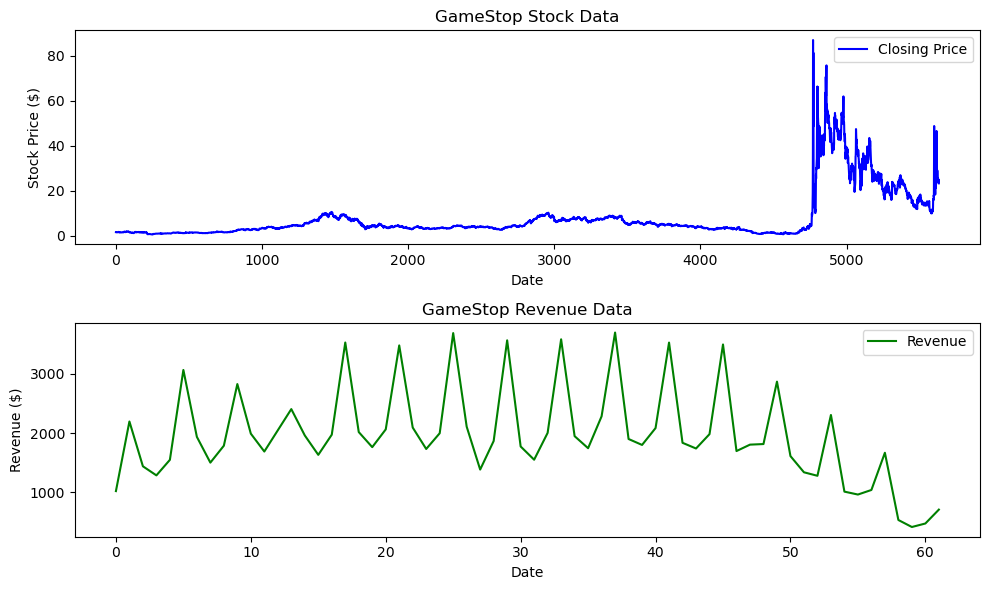

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Example of make_graph function
def make_graph(stock_data, revenue_data, title):
    plt.figure(figsize=(10, 6))

    # Plot stock data
    plt.subplot(2, 1, 1)  # Upper subplot for stock data
    plt.plot(stock_data.index, stock_data['Close'], label='Closing Price', color='blue')
    plt.title(f'{title} Stock Data')
    plt.xlabel('Date')
    plt.ylabel('Stock Price ($)')
    plt.legend()

    # Plot revenue data
    plt.subplot(2, 1, 2)  # Lower subplot for revenue data
    plt.plot(revenue_data.index, revenue_data['Revenue'], label='Revenue', color='green')
    plt.title(f'{title} Revenue Data')
    plt.xlabel('Date')
    plt.ylabel('Revenue ($)')
    plt.legend()

    # Adjust layout and display plot
    plt.tight_layout()
    plt.show()

# Assuming you have gme_data and gme_revenue DataFrames from previous operations

# Call the make_graph function with the actual data and title
make_graph(gme_data, gme_revenue, 'GameStop')


<h2>About the Authors:</h2> 

<a href="https://www.linkedin.com/in/joseph-s-50398b136/">Joseph Santarcangelo</a> has a PhD in Electrical Engineering, his research focused on using machine learning, signal processing, and computer vision to determine how videos impact human cognition. Joseph has been working for IBM since he completed his PhD.

Azim Hirjani


## Change Log

| Date (YYYY-MM-DD) | Version | Changed By    | Change Description        |
| ----------------- | ------- | ------------- | ------------------------- |
| 2022-02-28        | 1.2     | Lakshmi Holla | Changed the URL of GameStop |
| 2020-11-10        | 1.1     | Malika Singla | Deleted the Optional part |
| 2020-08-27        | 1.0     | Malika Singla | Added lab to GitLab       |

<hr>

## <h3 align="center"> © IBM Corporation 2020. All rights reserved. <h3/>

<p>
